In [36]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 31st, 2022 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. (Challenging) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. (Challenging) [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. (Challenging) [Your takeaway from the course](#15)

## Instructions
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://ubc-cs.github.io/cpsc330-2023W1/docs/homework_instructions.html). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 4. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).


**When you are ready to submit your assignment do the following:**

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
4. Make sure that the plots and output are rendered properly in your submitted file. 
5. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb.

## Imports

<!-- BEGIN QUESTION -->



In [115]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import HTML
import mglearn
from IPython.display import display

# Classifiers and regressors
from sklearn.dummy import DummyClassifier, DummyRegressor

# Preprocessing and pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# train test split and cross validation
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this assignment we'll be exploring a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset. In this assignment we'll try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on. You can find an explaination of the features [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit).  Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [39]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [60]:
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0) 
train, test = train_test_split(airbnb, test_size = 0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

(array([3.4127e+04, 6.4050e+03, 4.1720e+03, 2.2920e+03, 1.0310e+03,
        4.3600e+02, 2.1400e+02, 9.6000e+01, 5.7000e+01, 2.5000e+01,
        1.2000e+01, 1.4000e+01, 3.0000e+00, 5.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  1.17,  2.34,  3.51,  4.68,  5.85,  7.02,  8.19,  9.36,
        10.53, 11.7 , 12.87, 14.04, 15.21, 16.38, 17.55, 18.72, 19.89,
        21.06, 22.23, 23.4 , 24.57, 25.74, 26.91, 28.08, 29.25, 30.42,
        31.59, 32.76, 33.93, 35.1 , 36.27, 37.44, 38.61, 39.78, 40.95,
        42.12, 43.29, 44.46, 45.63

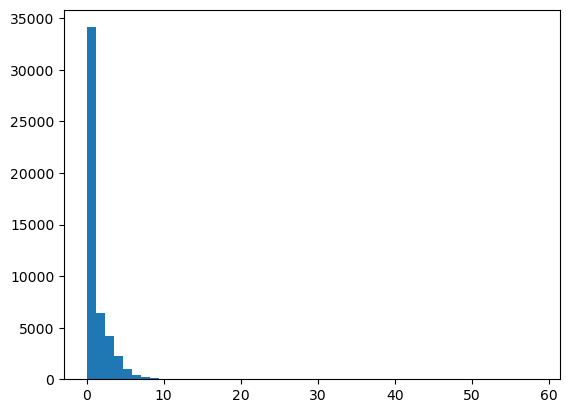

In [88]:
plt.hist(airbnb['reviews_per_month'], bins=50)

In [90]:
airbnb['reviews_per_month'].describe()

count    48895.000000
mean         1.090910
std          1.597283
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [61]:
train['last_review'] = pd.to_datetime(airbnb['last_review'])
train['last_review_yr_month'] = train['last_review'].dt.strftime('%Y-%m')
test['last_review'] = pd.to_datetime(airbnb['last_review'])
test['last_review_yr_month'] = test['last_review'].dt.strftime('%Y-%m')

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify any data cleaning that needs to be done and perform it.
2. Identify different feature types and the transformations you would apply on each feature type. 
3. Define a column transformer, if necessary.
4. You have likely noticed the `number_of_reviews` feature will be higly informative for the target `reviews_per_month`. To make this assignment more interesting **drop** the `number_of_reviews` feature.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [62]:
airbnb.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,48895.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.090910,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.597283,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.040000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.370000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,1.580000,2.000000,227.000000


In [44]:
train.value_counts(['last_review_yr_month'])

last_review_yr_month
2019-06                 8865
2019-07                 3273
2019-05                 2592
2019-04                 1015
2019-01                 1003
                        ... 
2011-04                    1
2012-07                    1
2011-05                    1
2014-02                    1
2011-03                    1
Name: count, Length: 90, dtype: int64

In [63]:
na_counts = airbnb.isna().sum()
na_counts

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [98]:
categorical_features = ['neighbourhood_group']
ordinal_features = ['room_type']
text_features = ['name']
numeric_features = ['latitude', 'longitude', 'price', 'minimum_nights', 'calculated_host_listings_count', 'availability_365']
drop_features = ['number_of_reviews', 'id', 'host_id', 'host_name', 'last_review', 'name', 'last_review_yr_month', 'neighbourhood']

In [99]:
room_levels = ['Private room', 'Shared room','Entire home/apt']

In [106]:
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer

ordinal_transformer = make_pipeline(OrdinalEncoder(categories=[room_levels], dtype=int))
numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
text_transformer = make_pipeline(CountVectorizer(stop_words='english', max_features=1000))


preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features), 
    (ordinal_transformer, ordinal_features), 
    (categorical_transformer, categorical_features), 
    # (text_transformer, text_features),
    ('drop', drop_features)
)

In [102]:
X_train = train.drop(columns= ['reviews_per_month'])
x_test = test.drop(columns= ['reviews_per_month'])
y_train = train['reviews_per_month']
y_test = test['reviews_per_month']

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [113]:
from sklearn.dummy import DummyClassifier

dummy = DummyRegressor(strategy='median')
dummy_pip = make_pipeline(preprocessor, dummy)

score = cross_validate(dummy, X_train, y_train, return_train_score=True)
score

{'fit_time': array([0.01019788, 0.00757575, 0.00699496, 0.00548196, 0.00467086]),
 'score_time': array([0.00209522, 0.00179291, 0.00094485, 0.00113797, 0.00086713]),
 'test_score': array([-0.20123875, -0.19812534, -0.1806408 , -0.21424867, -0.19230697]),
 'train_score': array([-0.19833383, -0.19226051, -0.20414967, -0.19535755, -0.19372557])}

<!-- END QUESTION -->



<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [111]:
linear_pip = make_pipeline(preprocessor, Ridge())

linear_scores = cross_validate(linear_pip, X_train, y_train, return_train_score=True)
linear_scores

{'fit_time': array([0.04865503, 0.06557894, 0.04087615, 0.0487771 , 0.04129887]),
 'score_time': array([0.02199721, 0.0153451 , 0.00998998, 0.01307583, 0.00934124]),
 'test_score': array([0.079162  , 0.06270343, 0.06547218, 0.07849038, 0.06527731]),
 'train_score': array([0.06958213, 0.07372431, 0.07330505, 0.06992951, 0.07277853])}

In [112]:
# code adapted from lecture 7
scores_dict = {
    "alpha": 10.0 ** np.arange(-3, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
}

for alpha in scores_dict["alpha"]:
    pipe_ridge = make_pipeline(preprocessor, Ridge(alpha=alpha))
    scores = cross_validate(pipe_ridge, X_train, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())

results_df = pd.DataFrame(scores_dict)
results_df

,alpha,mean_train_scores,mean_cv_scores
0,0.001,0.071864,0.070221
1,0.010,0.071864,0.070221
2,0.100,0.071864,0.070221
3,1.000,0.071864,0.070221
4,10.000,0.071862,0.070222
5,100.000,0.071760,0.070147
6,1000.000,0.070937,0.069495
7,10000.000,0.063936,0.063209
8,100000.000,0.026204,0.026138


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [127]:
dtree_pip = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=123))
cross_validate(dtree_pip, X_train, y_train, return_train_score=True)

In [116]:
random_pip = make_pipeline(preprocessor, RandomForestRegressor(random_state=123))
random_score = cross_validate(random_pip, X_train, y_train, return_train_score=True)
random_score

{'fit_time': array([16.77576017, 16.16061211, 18.61270094, 16.71971512, 18.59391618]),
 'score_time': array([0.38358283, 0.27884603, 0.21703219, 0.25835085, 0.23963594]),
 'test_score': array([0.3897552 , 0.34679058, 0.32338627, 0.3898613 , 0.3707203 ]),
 'train_score': array([0.91189677, 0.91133312, 0.91215562, 0.90861011, 0.90937717])}

In [124]:
from catboost import CatBoostRegressor
xgb_pip = make_pipeline(preprocessor, CatBoostRegressor(random_state=123))
xgb_score = cross_validate(xgb_pip, X_train, y_train, return_train_score=True)
xgb_score

Learning rate set to 0.069071
0:	learn: 1.5877626	total: 8.2ms	remaining: 8.19s
1:	learn: 1.5625880	total: 20.4ms	remaining: 10.2s
2:	learn: 1.5410401	total: 28.5ms	remaining: 9.47s
3:	learn: 1.5213963	total: 36.3ms	remaining: 9.04s
4:	learn: 1.5035010	total: 43.8ms	remaining: 8.71s
5:	learn: 1.4880129	total: 50.8ms	remaining: 8.42s
6:	learn: 1.4737997	total: 60.2ms	remaining: 8.54s
7:	learn: 1.4614244	total: 68.4ms	remaining: 8.48s
8:	learn: 1.4511292	total: 83.6ms	remaining: 9.21s
9:	learn: 1.4412608	total: 89.8ms	remaining: 8.89s
10:	learn: 1.4324746	total: 96.4ms	remaining: 8.67s
11:	learn: 1.4246929	total: 102ms	remaining: 8.39s
12:	learn: 1.4172089	total: 105ms	remaining: 8.01s
13:	learn: 1.4109895	total: 109ms	remaining: 7.71s
14:	learn: 1.4048670	total: 217ms	remaining: 14.3s
15:	learn: 1.3994778	total: 223ms	remaining: 13.7s
16:	learn: 1.3947176	total: 270ms	remaining: 15.6s
17:	learn: 1.3907776	total: 276ms	remaining: 15s
18:	learn: 1.3864700	total: 282ms	remaining: 14.6s
19:

{'fit_time': array([4.05880713, 4.10682511, 3.48435926, 3.80279207, 3.59219313]),
 'score_time': array([0.04768586, 0.04714489, 0.0322268 , 0.0532279 , 0.03454185]),
 'test_score': array([0.40955712, 0.36821319, 0.34564944, 0.40602067, 0.3963444 ]),
 'train_score': array([0.54014416, 0.54314789, 0.53016177, 0.54101349, 0.54213296])}

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## (Challenging) 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**Before submitting your assignment, please make sure you have followed all the instructions in the Submission instructions section at the top.**

This was a tricky one but you did it! Have a great weekend! 

![](img/eva-well-done.png)